<a href="https://colab.research.google.com/github/JCaballerot/Estadistica_para_la_ciencia_de_datos/blob/main/distribuciones/caso_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejecicio de distribución normal

In [27]:
import random
import pandas as pd

In [ ]:
resultados = []

for i in range(1, 10_000_001):
  dado1 = random.randrange(1, 7)
  dado2 = random.randrange(1, 7)
  resultado = [dado1 + dado2]
  resultados = resultados.append(resultado)


In [33]:
len(resultados)

298532

array([[<Axes: title={'center': 'resultado'}>]], dtype=object)

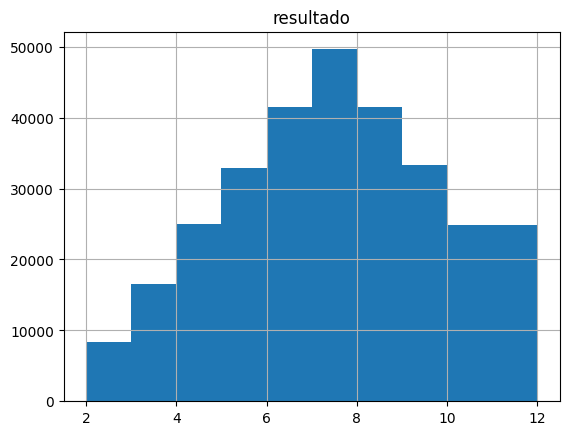

In [34]:
pd.DataFrame({'resultado' : resultados}).hist()


## Prueba Omnibus para demostrar normalidad en los datos

In [35]:

pddd = pd.read_csv('bank.csv')


<Axes: >

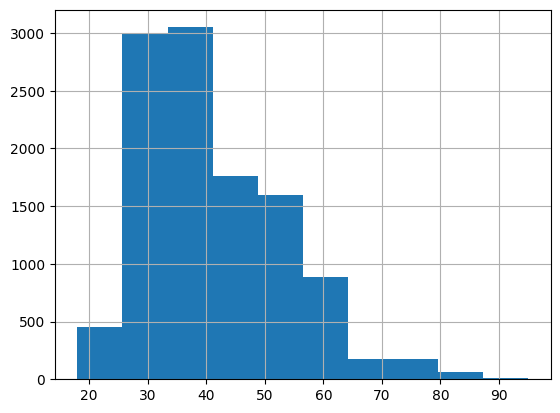

In [36]:
pddd.age.hist()

In [37]:

from scipy.stats import normaltest

#Ho: Los datos siguen una distribución normal
#Ha: No hay evidencia para probar que los datos sigan distribución normal


In [40]:
# alpha = 1 - %Confianza
def check_p_val(p_val, alpha):
    if p_val < alpha:
        print('Tenemos evidencia suficiente para rechazar la hipótesis nula.')
    else:
        print('No tenemos evidencia suficiente para rechazar la hipótesis nula.')

In [38]:
stat, p_val = normaltest(pddd.age)

In [41]:
check_p_val(p_val, 0.05)

Tenemos evidencia suficiente para rechazar la hipótesis nula.
